# **Chapter 1: Introduction**
This notebook provides some basic examples related `numpy`, `matplotlib` and `scikit-image`.

## Using numpy

In [1]:
import numpy as np

Let's create a simple vector using numpy:

In [2]:
A = np.array((1,2,3))

In [3]:
print(A)

[1 2 3]


Note that the indexing in numpy starts from 0.

In [4]:
A[1]

2

In the same way, we can create a 2D array that we can treat as a grayscale image.

In [5]:
B = np.array(((1,2,3),(4,5,6),(7,8,9)))

In [6]:
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


The entry in the second row and third column is:

In [7]:
B[1,2]

6

We can use numpy array slicing to extract a sub-array (or sub-image). For example, the $2 \times 2$ sub-matrix in the lower left corner of B is obtained by 

In [8]:
print(B[1:3,0:2])

[[4 5]
 [7 8]]


Note that in slicing the result includes the start index, but excludes the end index.

## Visualizing images
In this course, we use `matplotlib` for image visualization.

In [9]:
import matplotlib.pyplot as plt

The function we typically use to display the image is `imshow`.

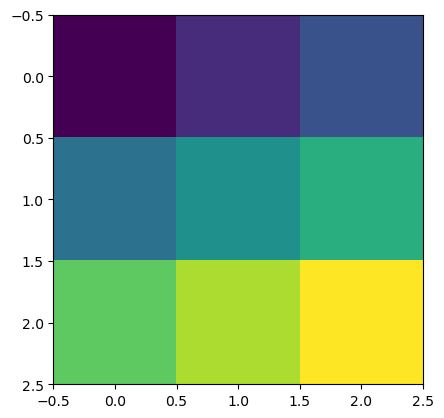

In [10]:
plt.imshow(B)

The default colormap name in matplotlib is 'viridis'. Often we assume that the images with a scalar value per pixel are grayscale images. Thus, we change the default colormap to 'gray' colormap. We can also disable the axis values.

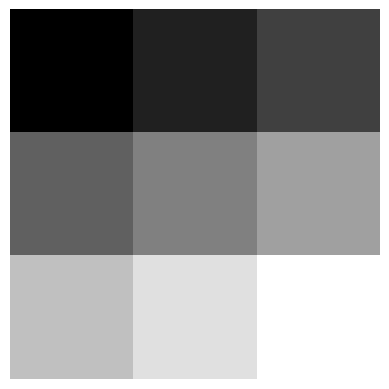

In [11]:
plt.imshow(B, cmap='gray')
plt.axis('off');

A $3 \times 3$ image is very small. Typical images have at least the size of $100 \times 100$ pixels. Therefore, let's create a random image of that size: 

In [12]:
C = np.random.rand(100,100)

We can check its size and data type with the following commands:

In [13]:
C.shape

(100, 100)

In [14]:
C.dtype

dtype('float64')

The minimum and maximum values are:

In [15]:
C.min()

0.00011525835204917456

In [16]:
C.max()

0.99989872368009

We can also try to print the image, but because of the large size we only see the values partially.

In [17]:
print(C)

[[0.44535248 0.65381516 0.01126484 ... 0.10852291 0.63794192 0.81356504]
 [0.33058137 0.92490555 0.22379583 ... 0.02711838 0.09181408 0.68969773]
 [0.09823384 0.59380817 0.94426366 ... 0.30383521 0.89227561 0.45933911]
 ...
 [0.04335023 0.80975467 0.09766869 ... 0.19975304 0.89122838 0.38996234]
 [0.47251239 0.38876937 0.68934835 ... 0.0357086  0.22335756 0.87934621]
 [0.65920921 0.29003029 0.85478133 ... 0.6449675  0.67488584 0.84141305]]


Thus, it is better to visualize the image using `imshow`.

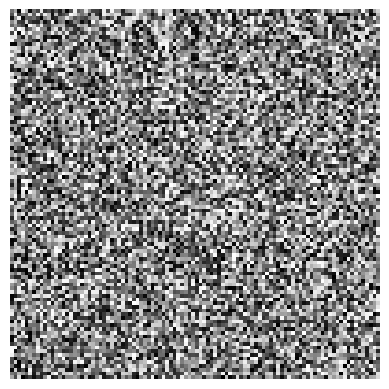

In [18]:
plt.imshow(C, cmap='gray')
plt.axis('off');

A random image is typically not very interesting. We can also do something more exciting by creating an image of a fractal.

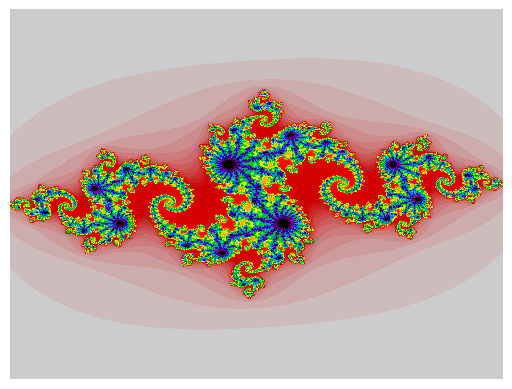

In [19]:
# Code modified from http://www.rosettacode.org/wiki/Julia_set
d, n = 200, 256  # pixel density & number of iterations
r = 2.0  # escape radius (must be greater than 2)
 
x = np.linspace(-1.5, 1.5, 4 * d + 1)
y = np.linspace(-1.5, 1.5, 3 * d + 1)
c=-0.8 + 0.156j
 
A, B = np.meshgrid(x, y)
Z = A + B * 1j
 
T = np.zeros(Z.shape)
 
for k in range(n):
    M = abs(Z) < r
    Z[M] = Z[M] ** 2 + c
    T[M] = k
 
plt.imshow(T,cmap='nipy_spectral_r')
plt.axis('off');

In grayscale, the fractal looks the following:

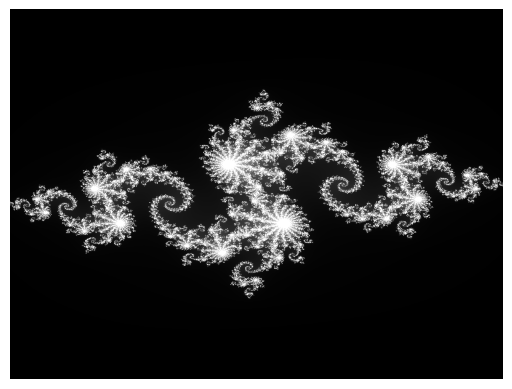

In [20]:
plt.imshow(T,cmap='gray')
plt.axis('off');

## Scikit-image package
Images are represented as `numpy` arrays and visualized using `matplotlib` in this course. However, the actual image processing is typically done using the `scikit-image` package. It is divided into modules, so that, for example, the  `data` module contains some sample images.

In [21]:
from skimage import data

You can find out what images are included by typing `help(data)`. One of the images is Chelsea that can be read using:

In [22]:
I = data.chelsea()

In [23]:
I.shape

(300, 451, 3)

The dimensions reveal that it is a color image with three channels.

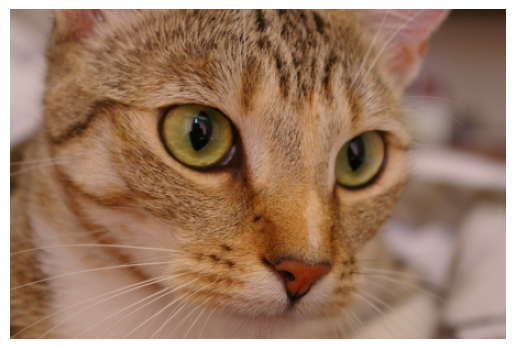

In [24]:
plt.imshow(I)
plt.axis('off');

In [25]:
I.dtype

dtype('uint8')

In [26]:
I.min(), I.max()

(0, 231)

Unlike the images in previous examples that used the floating point representation (their dtype was 'float64'), this image uses 8-bit unsigned integer representation. In many cases, when we do image processing it is better to convert the image to the floating point representation first to avoid unwanted effects such as saturation. This can be conveniently done using the `img_as_float` function.

In [27]:
from skimage import img_as_float

In [28]:
F = img_as_float(I)

In [29]:
F.dtype

dtype('float64')

The function also normalized the pixel values between 0.0 and 1.0.

In [30]:
F.min(), F.max()

(0.0, 0.9058823529411765)

Besides `data` there are many other modules in `scikit-image`. You can find a comprehensive list and an API reference from the [documentation page](https://scikit-image.org/docs/stable/).

As another example `color` module contains functions to manipulate image colors. To demonstrate that, let's convert our color image to a grayscale image:

In [31]:
from skimage.color import rgb2gray

G = rgb2gray(F)

In [32]:
G.shape

(300, 451)

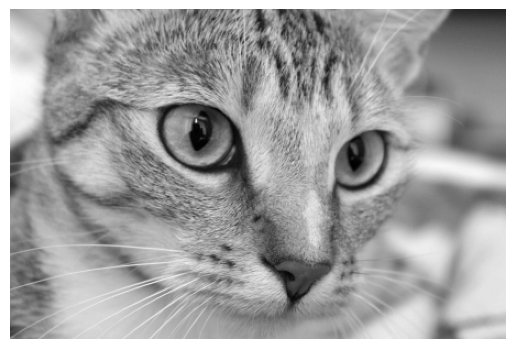

In [33]:
plt.imshow(G, cmap='gray')
plt.axis('off');

## Reading and writing image files

Image files can be handled with the `io` module.

In [34]:
from skimage import io

Let's write our image to a file and then read it back to a numpy array.

In [35]:
io.imsave('pict.jpg', I)

In [36]:
J = io.imread('pict.jpg')

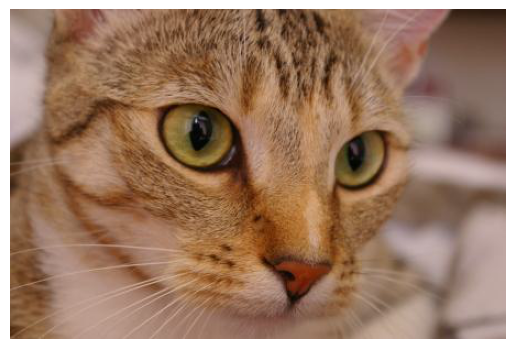

In [37]:
plt.imshow(J)
plt.axis('off');

The image looks the same as the original one, but because of the `jpg` compression, there are some small invisible differences (compression artefacts). Let's look at those differences a bit closer:

In [38]:
D = F - img_as_float(J)

In [39]:
D.min(), D.max()

(-0.12549019607843137, 0.19215686274509802)

To visualize the differences we need to boost them and limit to the range [0,1].

In [40]:
Db = (np.abs(D)*10).clip(0,1)

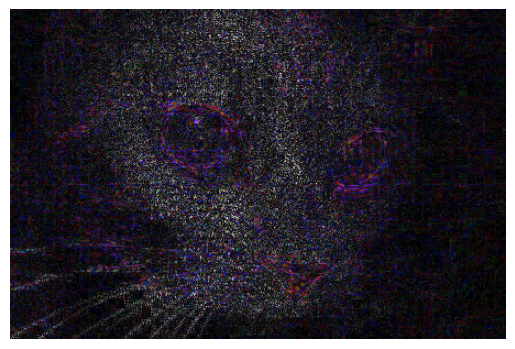

In [41]:
plt.imshow(Db)
plt.axis('off');

## Some tricks
To avoid defining the colormap every time, we can change the default values.

In [42]:
plt.rcParams['image.cmap']='gray'

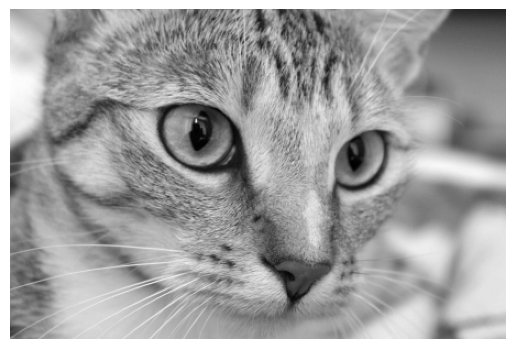

In [43]:
plt.imshow(G)
plt.axis('off');

We can also change the default size the image when it is rendered.

In [44]:
plt.rcParams['figure.figsize']=[10,6]

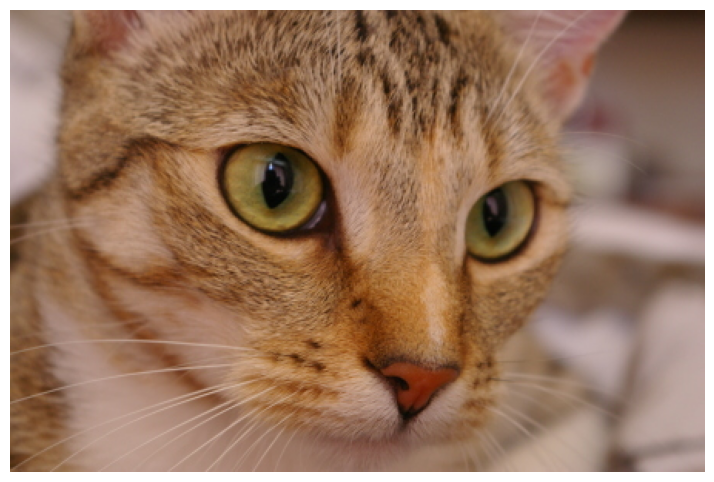

In [45]:
plt.imshow(I)
plt.axis('off');

Finally, if we don't want to use another function to turn off the axis labels, we can also do it in the following way:

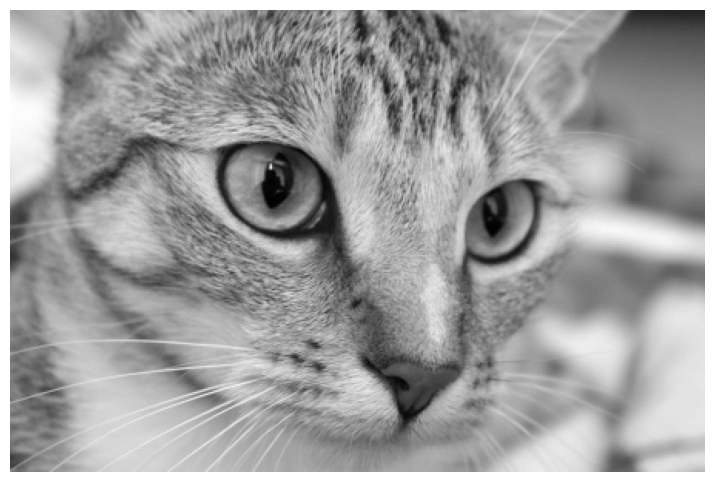

In [46]:
plt.imshow(G).axes.set_axis_off();